# Unsupervised Learning

## Clustering

Clustering is the task of identifying similar instances and assigning them to clusters, or groups of similar instances. It is used in a wide variety of applications, including:
* customer segmentation
* data analysis
* anomaly detection
* semi-supervised learning
* search engines
* segment an image

There is no universal definition of what a cluster is: it really depends on the context, and different algorithms will capture different kinds of clusters. Some algorithms look for instances centered around a particular point, called a centroid. Others look for continuous regions of densely packed instances: these clusters can take on any shape. 

### K-Means

The K-Means algorithm is a simple algorithm capable of clustering this kind of dataset very quickly and efficiently, often in just a few iterations. 

In [1]:
# make a sample dataset
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=5,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility
print(f"X.shape - {X.shape}")
print(f"y.shape - {y.shape}")

X.shape - (500, 2)
y.shape - (500,)


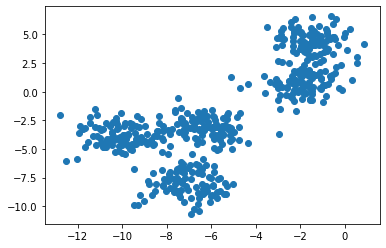

In [2]:
# plot dataset
import matplotlib.pyplot as plt

plt.scatter(*zip(*X))

In [3]:
# try K-Means on this dataset
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)
print(f"Predictions - \n{y_pred}")

Predictions - 
[4 1 3 2 3 0 4 1 0 2 3 3 1 4 0 0 2 2 4 1 0 1 3 4 4 1 3 0 3 1 1 2 3 1 1 0 2
 4 4 2 0 0 0 1 3 3 3 0 1 1 0 2 2 0 3 4 0 2 3 2 2 4 4 0 3 4 1 1 0 4 2 3 0 1
 2 1 2 0 1 1 3 0 4 3 3 4 2 4 4 3 1 4 3 2 0 1 3 0 1 1 4 0 1 0 1 3 1 0 4 4 0
 2 2 4 2 4 0 4 1 4 0 1 2 0 0 1 0 4 1 2 1 4 0 0 1 2 3 0 1 4 0 3 2 0 4 4 4 1
 3 3 3 2 0 4 1 0 2 0 1 1 2 0 2 0 0 4 2 2 0 1 4 2 0 1 1 4 0 2 0 0 3 2 1 3 4
 3 2 2 1 3 2 3 4 0 2 1 3 4 3 3 1 4 3 2 0 0 3 2 1 2 3 3 2 2 2 2 3 2 2 4 2 4
 1 2 2 1 2 0 0 0 2 4 3 0 1 0 4 0 2 1 4 1 1 0 3 3 3 3 1 0 3 0 1 4 4 1 1 4 0
 1 2 0 1 4 0 0 4 1 3 3 2 2 0 1 4 4 1 4 2 1 4 3 1 2 3 4 3 1 4 3 2 2 0 1 4 3
 3 4 1 0 2 3 2 3 1 0 2 3 2 3 3 0 4 3 1 1 4 4 1 2 0 4 3 3 4 4 3 0 4 0 3 3 3
 4 3 1 3 4 0 1 4 0 3 1 4 4 0 4 4 0 0 2 3 1 4 0 0 3 4 0 4 1 4 2 3 2 4 4 1 3
 4 2 3 2 2 2 2 2 2 4 2 4 4 0 4 3 0 3 2 0 0 4 3 2 3 0 3 2 2 4 0 3 2 1 4 1 1
 3 0 1 3 0 0 3 2 2 0 0 2 1 0 2 1 4 2 3 4 3 1 0 4 0 1 0 1 2 4 2 1 1 3 3 2 0
 4 2 1 3 1 1 2 2 3 1 3 1 1 1 3 3 3 2 2 1 4 1 4 1 2 2 4 0 4 2 3 2 3 0 4 1 3
 4 3 4 2 1

Each instance was assigned to one of the five clusters. In the context of clustering, an instance’s label is the index of the cluster that this instance gets assigned to by the algorithm: this is not to be confused with the class labels in classification (remember that clustering is an unsupervised learning task). The KMeans instance preserves a copy of the labels of the instances it was trained on, available via the labels_ instance variable:

In [4]:
y_pred is kmeans.labels_

True

In [5]:
# check centroids
centers = kmeans.cluster_centers_
centers

array([[-10.06803235,  -3.86080028],
       [ -1.94678228,   0.75595381],
       [ -7.06987369,  -8.00398029],
       [ -6.25834345,  -3.13587364],
       [ -1.4648927 ,   4.48324949]])

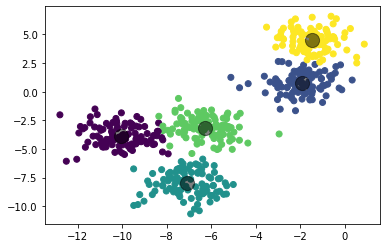

In [6]:
# plot clusters
plt.scatter(*zip(*X), c=y_pred, cmap='viridis')

# plot centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [7]:
# prediction on new data
import numpy as np

X_new = np.array([[-2, 10], [10, -3]])
print(kmeans.predict(X_new))

[4 1]


The K-Means algorithm does not behave very well when the blobs have very different diameters because all it cares about when assigning an instance to a cluster is the distance to the centroid.

Instead of assigning each instance to a single cluster, which is called hard clustering, it can be useful to give each instance a score per cluster, which is called soft clustering. The score can be the distance between the instance and the centroid; conversely, it can be a similarity score (or affinity), such as the Gaussian Radial Basis Function. In the KMeans class, the transform() method measures the distance from each instance to every centroid:

In [8]:
kmeans.transform(X_new)

array([[16.03792164,  9.24419938, 18.7041954 , 13.80886184,  5.54264161],
       [20.0864855 , 12.52329013, 17.78820976, 16.2589112 , 13.69097468]])

In this example, first point is at distance of 5.5 from cluster 1's centroid, 18.7 from cluster 2's and so on. If you have a high-dimensional dataset and you transform it this way, you end up with a k-dimensional dataset: this transformation can be a very efficient nonlinear dimensionality reduction technique.

#### The K-means algo

So, how does the algorithm work? Well, suppose you were given the centroids. You could easily label all the instances in the dataset by assigning each of them to the cluster whose centroid is closest. Conversely, if you were given all the instance labels, you could easily locate all the centroids by computing the mean of the instances for each cluster. But you are given neither the labels nor the centroids, so how can you proceed? Well, just start by placing the centroids randomly (e.g., by picking k instances at random and using their locations as centroids). Then label the instances, update the centroids, label the instances, update the centroids, and so on until the centroids stop moving. The algorithm is guaranteed to converge in a finite number of steps (usually quite small); it will not oscillate forever.

NOTE: The computational complexity of the algorithm is generally linear with regard to the number of instances m, the number of clusters k, and the number of dimensions n. However, this is only true when the data has a clustering structure. If it does not, then in the worstcase scenario the complexity can increase exponentially with the number of instances. In practice, this rarely happens, and K-Means is generally one of the fastest clustering algorithms.

Although the algorithm is guaranteed to converge, it may not converge to the right solution (i.e., it may converge to a local optimum): whether it does or not depends on the centroid initialization.

#### Centroid Initialization Methods

If you happen to know approximately where the centroids should be (e.g., if you ran another clustering algorithm earlier), then you can set the init hyperparameter to a NumPy array containing the list of centroids, and set *n_init* to 1:
``` Python
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)
```

Another solution is to run the algorithm multiple times with different random initializations and keep the best solution. The number of random initializations is controlled by the n_init hyperparameter: by default, it is equal to 10, which means that the whole algorithm described earlier runs 10 times when you call fit(), and ScikitLearn keeps the best solution.

But how exactly does it know which solution is the best? It uses a performance metric! That metric is called the ***model’s inertia***, which is the mean squared distance between each instance and its closest centroid.

The KMeans class runs the algorithm n_init times and keeps the model with the lowest inertia.

In [9]:
kmeans.inertia_

894.4750847990772

An important improvement to the K-Means algorithm, K-Means++. It introduced a smarter initialization step that tends to select centroids that are distant from one another, and this improvement makes the K-Means algorithm much less likely to converge to a suboptimal solution. They showed that the additional computation required for the smarter initialization step is well worth it because it makes it possible to drastically reduce the number of times the algorithm needs to be run to find the optimal solution.

The KMeans class uses this initialization method by default. If you want to force it to use the original method (i.e., picking k instances randomly to define the initial centroids), then you can set the init hyperparameter to "random". You will rarely need to do this.

#### Accelerated K-Means and mini-batch K-Means

Another important improvement to the K-Means algorithm was proposed in a 2003 paper by Charles Elkan. It considerably accelerates the algorithm by avoiding many unnecessary distance calculations. Elkan achieved this by exploiting the triangle inequality (i.e., that a straight line is always the shortest distance between two points5) and by keeping track of lower and upper bounds for distances between instances and centroids. This is the algorithm the KMeans class uses by default (you can force it to use the original algorithm by setting the algorithm hyperparameter to "full", although you probably will never need to).

Yet another important variant of the K-Means algorithm was proposed in a 2010 paper by David Sculley.6 Instead of using the full dataset at each iteration, the algorithm is capable of using mini-batches, moving the centroids just slightly at each iteration. This speeds up the algorithm typically by a factor of three or four and makes it possible to cluster huge datasets that do not fit in memory. Scikit-Learn implements this algorithm in the MiniBatchKMeans class. You can just use this class like the KMeans class:



In [10]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [11]:
# check centroids
print(f"Cluster Centers - \n{kmeans.cluster_centers_}")
print(f"Preds - {kmeans.predict(X_new)}")

Cluster Centers - 
[[-10.06803235  -3.86080028]
 [ -1.94678228   0.75595381]
 [ -7.06987369  -8.00398029]
 [ -6.25834345  -3.13587364]
 [ -1.4648927    4.48324949]]
Preds - [4 1]


Although the Mini-batch K-Means algorithm is much faster than the regular KMeans algorithm, its inertia is generally slightly worse, especially as the number of clusters increases. 

#### Finding the optimal number of clusters

So far, we have set the number of clusters k to 5 because it was obvious by looking at the data that this was the correct number of clusters. But in general, it will not be so easy to know how to set k, and the result might be quite bad if you set it to the wrong value. 

You might be thinking that we could just pick the model with the lowest inertia, right? Unfortunately, it is not that simple. The inertia is not a good performance metric when trying to choose k because it keeps getting lower as we increase k. Indeed, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be.[link text](https://)

In [12]:
from sklearn.metrics import silhouette_score
inertias = []
silhouette_scores = [] # will be used later
for clusters in range(2, 10):
    kmeans = KMeans(n_clusters=clusters)
    y_pred = kmeans.fit_predict(X)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))  # will be used later

In [13]:
inertias

[3789.8206285363967,
 2348.6845457286636,
 1593.7467972943434,
 894.4750847990772,
 807.4159140827066,
 730.3108992866318,
 657.7951937079963,
 607.3715257061244]

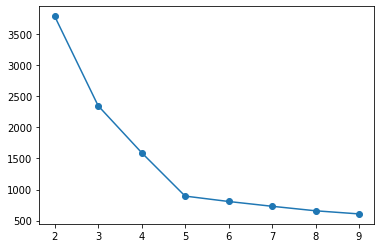

In [14]:
plt.plot(range(2, 10), inertias)
plt.scatter(range(2, 10), inertias)

The inertia drops very quickly as we increase k up to 5, but then it decreases much more slowly as we keep increasing k. This curve has roughly the shape of an arm, and there is an “elbow” at k = 5. So, 5 would be a good choice: any lower value would be dramatic, while any higher value would not help much, and we might just be splitting perfectly good clusters in half for no good reason.

This technique for choosing the best value for the number of clusters is rather coarse. A more precise approach (but also more computationally expensive) is to use the ***silhouette score***, which is the mean silhouette coefficient over all the instances. An instance’s silhouette coefficient is equal to $\frac{(b – a)}{max(a, b)}$ <br>
where: 
* $a$ is the mean distance to the other instances in the same cluster (i.e., the mean intra-cluster distance) 
* $b$ is the mean nearest-cluster distance (i.e., the mean distance to the instances of the next closest cluster, defined as the one that minimizes b, excluding the instance’s own cluster) 

The silhouette coefficient can vary between –1 and +1. A coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to –1 means that the instance may have been assigned to the wrong cluster.

In [15]:
# compute silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.35963211837197456

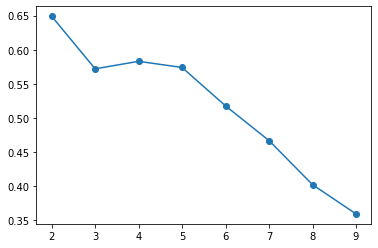

In [16]:
# silhouette_scores plot
plt.plot(range(2, 10), silhouette_scores)
plt.scatter(range(2, 10), silhouette_scores)

As you can see, this visualization is much richer than the previous one: although it confirms that k = 5 is a very good choice, it also underlines the fact that k = 2 is also very good and probably better than 5 (as evident from dataset plot). This was not visible when comparing inertias.

So, we can probably use a combination of inertias and silhouette scores to select the best cluster size.

An even more informative visualization is obtained when you plot every instance’s silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. This is called a silhouette diagram. Each diagram contains one knife shape per cluster. The shape’s height indicates the number of instances the cluster contains, and its width represents the sorted silhouette coefficients of the instances in the cluster (wider is better). The dashed line indicates the mean silhouette coefficient.

For n_clusters = 2 The average silhouette_score is : 0.6490423012067442
For n_clusters = 3 The average silhouette_score is : 0.5720605952669966
For n_clusters = 4 The average silhouette_score is : 0.5830422035169395
For n_clusters = 5 The average silhouette_score is : 0.5740089825824137
For n_clusters = 6 The average silhouette_score is : 0.5206045531413668
For n_clusters = 7 The average silhouette_score is : 0.457832656794596
For n_clusters = 8 The average silhouette_score is : 0.3987161690835145
For n_clusters = 9 The average silhouette_score is : 0.362318744484873


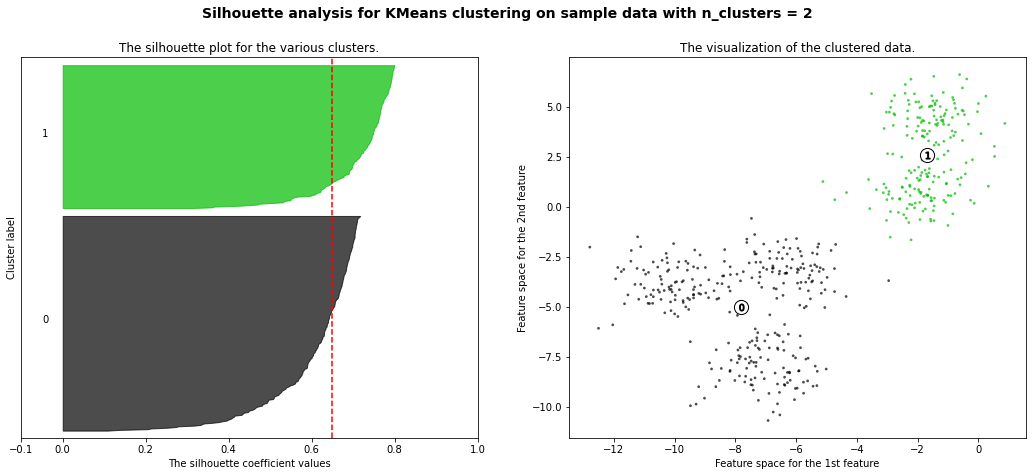

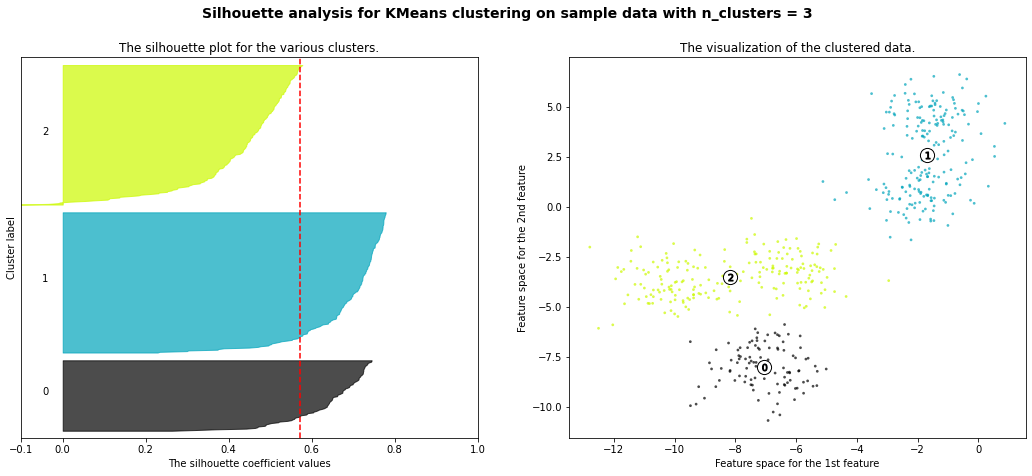

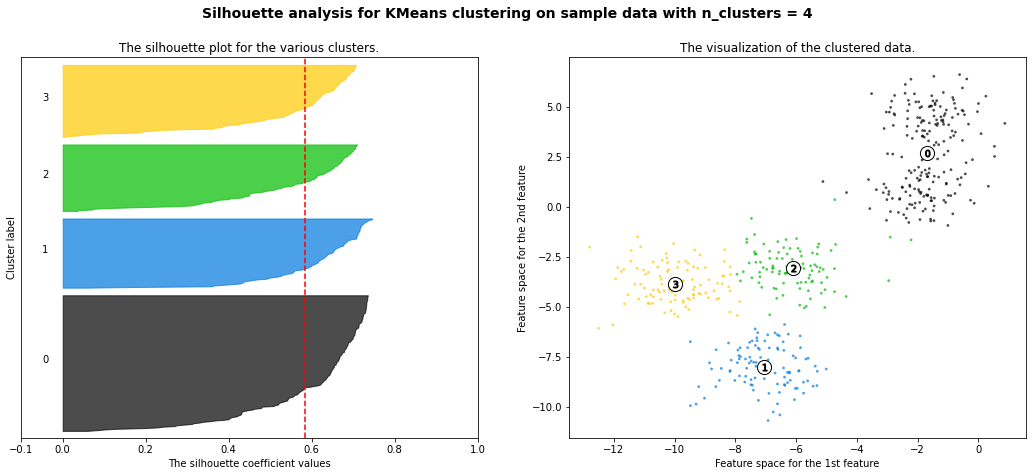

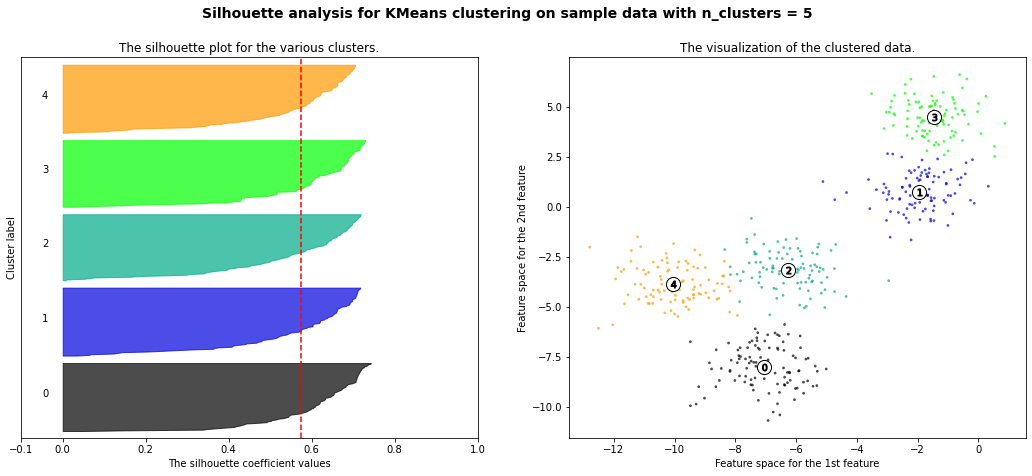

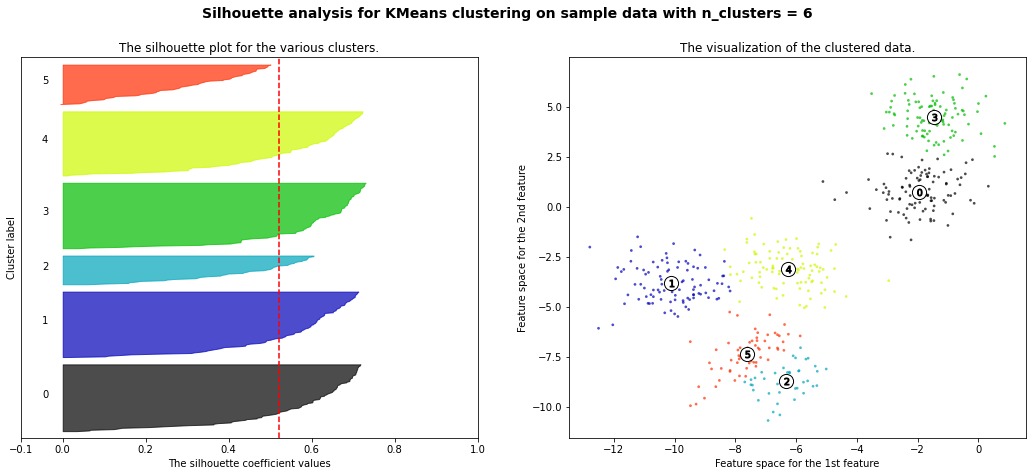

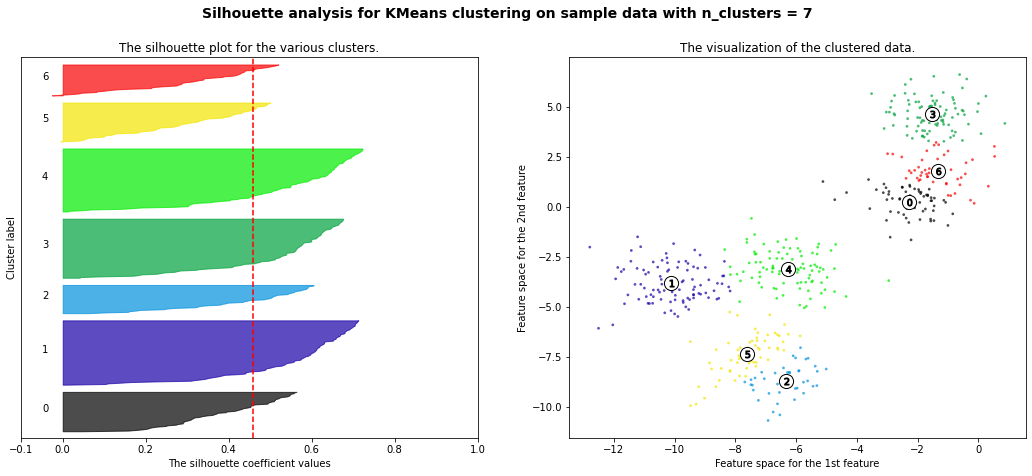

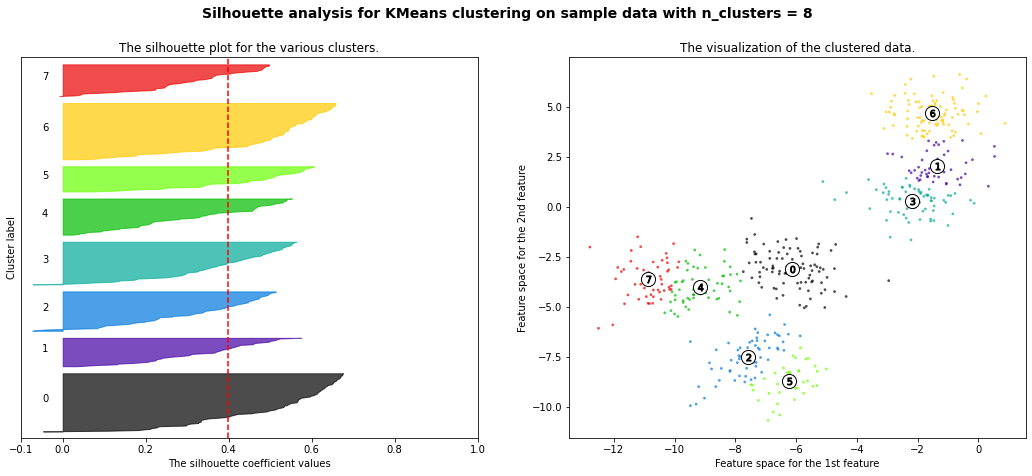

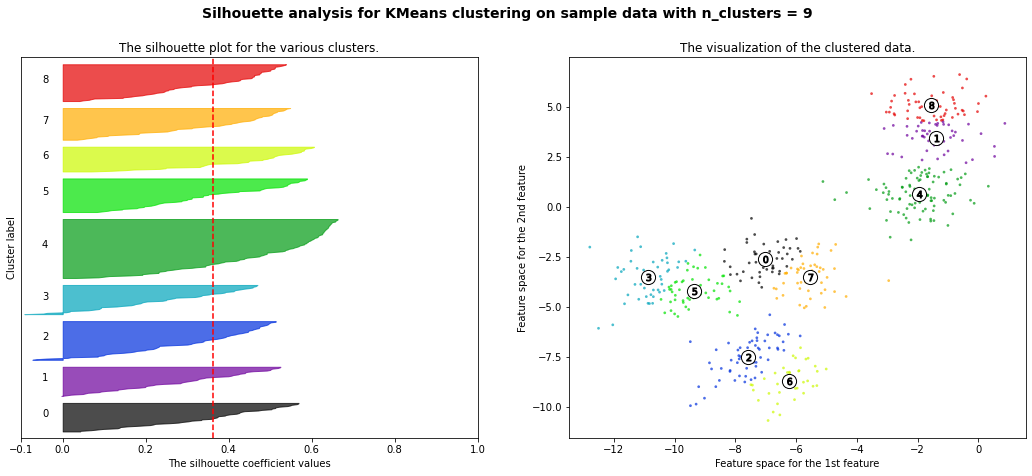

In [17]:
# taken from (https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

for n_clusters in range(2, 10):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

The vertical dashed lines represent the silhouette score for each number of clusters. When most of the instances in a cluster have a lower coefficient than this score (i.e., if many of the instances stop short of the dashed line, ending to the left of it), then the cluster is rather bad since this means its instances are much too close to other clusters. 

### Limits of K-Means

Despite its many merits, most notably being fast and scalable, K-Means is not perfect. As we saw, it is necessary to run the algorithm several times to avoid suboptimal solutions, plus you need to specify the number of clusters, which can be quite a hassle. Moreover, K-Means does not behave very well when the clusters have varying sizes, different densities, or nonspherical shapes.

NOTE: It is important to scale the input features before you run K-Means, or the clusters may be very stretched and K-Means will perform poorly. Scaling the features does not guarantee that all the clusters will be nice and spherical, but it generally improves things.

### Using Clustering for Image Segmentation

***Image segmentation*** is the task of partitioning an image into multiple segments. In ***semantic segmentation***, all pixels that are part of the same object type get assigned to the same segment. For example, in a self-driving car’s vision system, all pixels that are part of a pedestrian’s image might be assigned to the “pedestrian” segment (there would be one segment containing all the pedestrians). In ***instance segmentation***, all pixels that are part of the same individual object are assigned to the same segment. In this case there would be a different segment for each pedestrian. The state of the art in semantic or instance segmentation today is achieved using complex architectures based on convolutional neural networks. 

Here, we are going to do something much simpler: color segmentation. We will simply assign pixels to the same segment if they have a similar color. In some applications, this may be sufficient. For example, if you want to analyze satellite images to measure how much total forest area there is in a region, color segmentation may be just fine.

image.shape - (533, 800, 3)


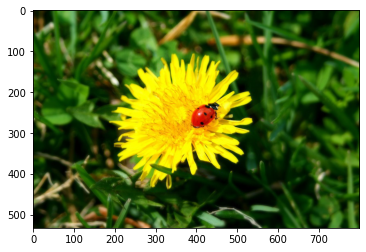

In [19]:
from imageio import imread # or `from imageio import imread

image = imread('./ladybug.png')
plt.imshow(image)

print(f"image.shape - {image.shape}")

In [20]:
image[:, :, 1]

Array([[ 29,  28,  29, ..., 105, 103,  99],
       [ 28,  27,  27, ..., 108, 106, 102],
       [ 27,  26,  26, ..., 114, 111, 105],
       ...,
       [ 18,  18,  20, ...,  61,  56,  51],
       [ 18,  18,  19, ...,  59,  54,  49],
       [ 17,  17,  18, ...,  58,  52,  48]], dtype=uint8)

The image is represented as a 3D array. The first dimension’s size is the height; the second is the width; and the third is the number of color channels, in this case red, green, and blue (RGB). In other words, for each pixel there is a 3D vector containing the intensities of red, green, and blue, each between 0.0 and 1.0 (or between 0 and 255, if you use imageio.imread()). Some images may have fewer channels, such as grayscale images (one channel). And some images may have more channels, such as images with an additional ***alpha channel*** for transparency or satellite images, which often contain channels for many light frequencies (e.g., infrared). The following code reshapes the array to get a long list of RGB colors, then it clusters these colors using K-Means:

X.shape - (426400, 3)


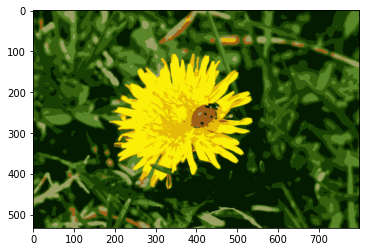

In [21]:
X = image.reshape(-1, 3)
print(f"X.shape - {X.shape}")

# cluster image to 8 colors
kmeans8 = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans8.cluster_centers_[kmeans8.labels_]
segmented_img = segmented_img.reshape(image.shape)
plt.imshow(segmented_img.astype(np.int))

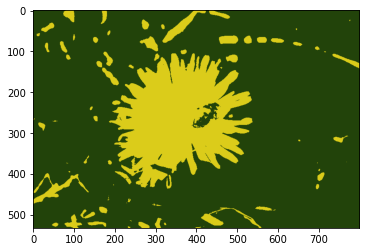

In [22]:
# cluster image to 2 colors
kmeans2 = KMeans(n_clusters=2).fit(X)
segmented_img = kmeans2.cluster_centers_[kmeans2.labels_]
segmented_img = segmented_img.reshape(image.shape)
plt.imshow(segmented_img.astype(np.int))

When you use fewer than eight clusters, notice that the ladybug’s flashy red color fails to get a cluster of its own: it gets merged with colors from the environment. This is because K-Means prefers clusters of similar sizes. The ladybug is small—much smaller than the rest of the image—so even though its color is flashy, K-Means fails to dedicate a cluster to it.

### Using Clustering for Preprocessing

Clustering can be an efficient approach to dimensionality reduction, in particular as a preprocessing step before a supervised learning algorithm. As an example of using clustering for dimensionality reduction, let’s tackle the digits dataset, which is a simple MNIST-like dataset containing 1,797 grayscale 8 × 8 images representing the digits 0 to 9.



In [23]:
# load dataset
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)
print(f"X_digits.shape - {X_digits.shape}")
print(f"y_digits.shape - {y_digits.shape}")

# split it into a training set and a test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

X_digits.shape - (1797, 64)
y_digits.shape - (1797,)


In [24]:
# fit a Logistic Regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='newton-cg', max_iter=1000)
log_reg.fit(X_train, y_train)

# evaluate score
print(f"Accuracy - {log_reg.score(X_test, y_test)}")

Accuracy - 0.9644444444444444


Let’s see if we can do better by using K-Means as a preprocessing step. We will create a pipeline that will first cluster the training set into 50 clusters and replace the images with their distances to these 50 clusters, then apply a Logistic Regression model:

In [25]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(
    [
     ("kmeans", KMeans(n_clusters=50)),
     ("log_reg", LogisticRegression(solver='newton-cg', max_iter=1000)),
    ]
)

# fit pipeline
pipeline.fit(X_train, y_train)

# evaluate score
print(f"Accuracy - {pipeline.score(X_test, y_test)}")

Accuracy - 0.9755555555555555


We can surely do better. Since KMeans is just a preprocessing step in a classification pipeline, finding a good value for k is much simpler than earlier. There’s no need to perform silhouette analysis or minimize the inertia; the best value of k is simply the one that results in the best classification performance during cross-validation. We can use GridSearchCV to find the optimal number of clusters:

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2, n_jobs=-1)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 294 out of 294 | elapsed: 14.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=50, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=None, tol=0.0001,
                                               verbose=0)),
                                       ('log_reg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                    

In [27]:
# Let’s look at the best value for k and the performance of the resulting pipeline:
print(f"Best parameters - {grid_clf.best_params_}")
print(f"Accuracy - {grid_clf.score(X_test, y_test)}")

Best parameters - {'kmeans__n_clusters': 66}
Accuracy - 0.9777777777777777


### Using Clustering for Semi-Supervised Learning

Another use case for clustering is in semi-supervised learning, when we have plenty of unlabeled instances and very few labeled instances. Let’s train a Logistic Regression model on a sample of 50 labeled instances from the digits dataset:

In [28]:
n_labeled = 50
log_reg = LogisticRegression(solver='newton-cg', max_iter=1000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

# evaluate score
print(f"Accuracy - {log_reg.score(X_test, y_test)}")

Accuracy - 0.76


It should come as no surprise that this is much lower than earlier, when we trained the model on the full training set. Let’s see how we can do better. First, let’s cluster the training set into 50 clusters. Then for each cluster, let’s find the image closest to the centroid. We will call these images the representative images:

In [29]:
k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]
y_representative_digits = y_train[representative_digit_idx]

index - 2 	label - 0


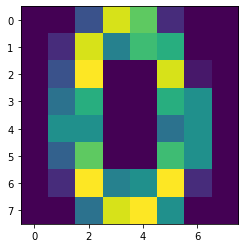

In [30]:
i = 2
plt.imshow(X_representative_digits[i].reshape(8, -1))
print(f"index - {i} \tlabel - {y_representative_digits[i]}")

Now we have a dataset with just 50 labeled instances, but instead of being random instances, each of them is a representative image of its cluster. Let’s see if the perfor‐ mance is any better:

In [31]:
log_reg = LogisticRegression(solver='newton-cg', max_iter=1000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9155555555555556

Since it is often costly and painful to label instances, especially when it has to be done manually by experts, it is a good idea to label representative instances rather than just random instances. 


### DBSCAN

This algorithm defines clusters as continuous regions of high density. Here is how it works:
* For each instance, the algorithm counts how many instances are located within a small distance ε (epsilon) from it. This region is called the instance’s ε- neighborhood.
* If an instance has at least *min_samples* instances in its ε-neighborhood (including itself), then it is considered a *core instance*. In other words, core instances are those that are located in dense regions.
* All instances in the neighborhood of a core instance belong to the same cluster. This neighborhood may include other core instances; therefore, a long sequence of neighboring core instances forms a single cluster.
* Any instance that is not a core instance and does not have one in its neighborhood is considered an anomaly.

This algorithm works well if all the clusters are dense enough and if they are well separated by low-density regions. The DBSCAN class in Scikit-Learn is as simple to use as you might expect. Let’s test it on the moons dataset:

In [32]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [33]:
# check labels of all instances
dbscan.labels_

array([ 4,  0,  0,  1,  2,  2,  0,  2, -1,  0, -1,  0,  2,  0,  3,  7, -1,
        2, -1,  2,  4,  0,  2,  0,  2,  0,  5,  6,  0,  4,  0,  0,  4,  2,
        0,  7,  3,  7,  0,  0,  4,  4, -1,  2,  2,  2,  0,  2,  2,  0,  3,
        0,  2,  6,  6,  2,  2,  0,  4,  7,  2,  4, -1,  4, -1,  2,  2,  0,
        3,  0,  2,  4,  5,  0,  0,  3,  0,  0,  0,  0,  2,  2,  0,  6, -1,
        3,  0, -1,  2,  2,  8,  7,  4,  2,  2,  0,  0,  4,  2,  0,  4,  6,
        0,  0,  5,  4,  7,  5,  0, -1,  0,  0,  6,  5,  0, -1,  4,  0, -1,
        0, -1,  0,  2,  2,  4,  4,  2,  7,  2,  5,  0,  2,  7,  1,  7,  2,
        0,  0,  0,  0, -1,  0,  4,  2,  4,  0,  2,  0,  7, -1,  5,  2, -1,
        0, -1,  4,  0,  4,  0,  0,  2,  7,  0,  0,  4,  4,  4,  6,  0,  0,
       -1,  4,  0,  0,  2,  5,  0, -1,  2,  2,  0,  6,  1,  4,  7,  0,  2,
        0,  2,  2, -1,  4,  4, -1,  4,  0,  2,  0,  3,  2,  4, -1,  2,  2,
        2,  0,  4,  0,  4,  6,  0,  2,  0,  0,  2,  0, -1,  0,  2,  2,  6,
        0,  0,  2, -1,  1

Some instances have a cluster index equal to –1, which means that they are considered as anomalies by the algorithm. The indices of the core instances are available in the core_sample_indices_ instance variable, and the core instances themselves are available in the components_ instance variable:

In [34]:
# number of core sample instances
print(f"number of core sample instances - {len(dbscan.core_sample_indices_)}")

# core sample indices
print(f"Core sample indices - {dbscan.core_sample_indices_}")

# core components
print(f"core components - {dbscan.components_}")

number of core sample instances - 788
Core sample indices - [  1   2   3   4   5   6   7   9  11  12  14  17  19  20  22  23  24  25
  26  27  28  29  30  31  32  35  36  37  38  40  41  44  45  46  47  48
  50  51  52  53  55  56  57  58  60  63  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  85  86  88  89  90  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 110 111 112 113 114
 116 119 121 122 124 125 126 127 129 130 131 132 133 134 135 136 137 138
 139 141 143 144 146 147 148 150 151 153 155 156 157 158 159 160 161 163
 164 165 166 167 168 169 171 172 173 174 175 176 178 181 182 184 185 186
 187 188 189 191 195 196 197 198 199 200 203 204 205 206 207 208 209 210
 211 212 213 214 215 217 218 219 220 221 222 225 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 244 246 247 248 249 250 251 252
 253 256 257 258 259 260 261 262 263 264 265 266 267 270 271 272 273 274
 275 276 277 278 279 280 281 283 285 287 288 289 291 293 295 296

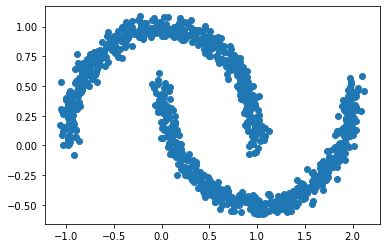

In [35]:
plt.scatter(*zip(*X))

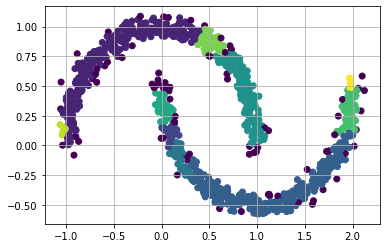

In [36]:
plt.scatter(*zip(*X), c=dbscan.labels_, cmap='viridis')
plt.grid()

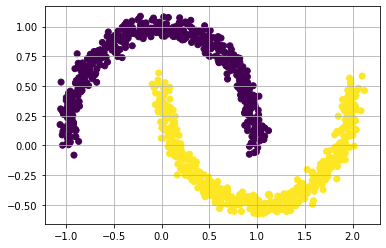

In [37]:
# much better clustering by changing eps
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)
plt.scatter(*zip(*X), c=dbscan.labels_, cmap='viridis')
plt.grid()

The DBSCAN class does not have a predict() method, although it has a fit_predict() method. In other words, it cannot predict which cluster a new instance belongs to. This implementation decision was made because different classification algorithms can be better for different tasks, so the authors decided to let the user choose which one to use. Moreover, it’s not hard to implement. 


In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [39]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
print(f"Labels for new data - {knn.predict(X_new)}")
print(f"probab for each cluster - \n{knn.predict_proba(X_new)}")

Labels for new data - [0 1 0 1]
probab for each cluster - 
[[0.88 0.12]
 [0.   1.  ]
 [0.84 0.16]
 [0.   1.  ]]


Note that we only trained the classifier on the core instances, but we could also have chosen to train it on all the instances, or all but the anomalies: this choice depends on the final task.

In short, DBSCAN is a very simple yet powerful algorithm capable of identifying any number of clusters of any shape. It is robust to outliers, and it has just two hyperparameters (eps and min_samples). If the density varies significantly across the clusters, however, it can be impossible for it to capture all the clusters properly. Its computational complexity is roughly $O(m log(m))$, making it pretty close to linear with regard to the number of instances, but Scikit-Learn’s implementation can require up to $O(m^2)$ memory if eps is large.

Some of the other clustering techniques implemented in sklearn can be found [here](https://scikit-learn.org/stable/modules/clustering.html).

## Gaussian Mixtures

A Gaussian mixture model (GMM) is a probabilistic model that assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown. All the instances generated from a single Gaussian distribution form a cluster that typically looks like an ellipsoid. Each cluster can have a different ellipsoidal shape, size, density, and orientation. When you observe an instance, you know it was generated from one of the Gaussian distributions, but you are not told which one, and you do not know what the parameters of these distributions are.

There are several GMM variants. In the simplest variant, implemented in the GaussianMixture class, you must know in advance the number k of Gaussian distributions. More about it [here](https://scikit-learn.org/stable/modules/mixture.html).

So, what can you do with such a model? Well, given the dataset $X$, you typically want to start by estimating the weights $ϕ$ and all the distribution parameters $μ^{(1)}$ to $μ^{(k)}$ and $Σ^{(1)}$ to $Σ^{(k)}$. Scikit-Learn’s GaussianMixture class makes this super easy:

In [40]:
# create dataset
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=5,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility
print(f"X.shape - {X.shape}")
print(f"y.shape - {y.shape}")

X.shape - (500, 2)
y.shape - (500,)


In [41]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=5, n_init=10)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [42]:
# check parameters that the algorithm estimated
print(f"weights - \n{gm.weights_}")
print(f"means - \n{gm.means_}")
print(f"covariances - \n{gm.covariances_}")

weights - 
[0.20263372 0.20661864 0.19739434 0.20498734 0.18836596]
means - 
[[ -1.92454535   0.77330578]
 [-10.01181914  -3.85352711]
 [ -1.48662732   4.47638621]
 [ -7.06617966  -7.95853068]
 [ -6.21797935  -3.09840141]]
covariances - 
[[[ 8.76385407e-01  1.41375431e-01]
  [ 1.41375431e-01  8.62689641e-01]]

 [[ 1.15324115e+00 -8.21501452e-02]
  [-8.21501452e-02  8.74167657e-01]]

 [[ 7.04495645e-01 -7.20925589e-02]
  [-7.20925589e-02  8.29304350e-01]]

 [[ 9.81267759e-01  8.14263244e-04]
  [ 8.14263244e-04  1.22154332e+00]]

 [[ 9.24546002e-01 -2.24674631e-01]
  [-2.24674631e-01  8.01121022e-01]]]


This class relies on the ***Expectation Maximization (EM)*** algorithm, which has many similarities with the K-Means algorithm: it also initializes the cluster parameters randomly, then it repeats two steps until convergence, first assigning instances to clusters (this is called the expectation step) and then updating the clusters (this is called the maximization step). Sounds familiar, right? In the context of clustering, you can think of EM as a generalization of K-Means that not only finds the cluster centers ($μ^{(1)}$ to $μ^{(k)}$), but also their size, shape, and orientation ($Σ^{(1)}$ to $Σ^{(k)}$), as well as their relative weights ($ϕ^{(1)}$ to $ϕ^{(k)}$). Unlike KMeans, though, EM uses ***soft cluster assignments***, not hard assignments. For each instance, during the expectation step, the algorithm estimates the probability that it belongs to each cluster (based on the current cluster parameters). Then, during the maximization step, each cluster is updated using all the instances in the dataset, with each instance weighted by the estimated probability that it belongs to that cluster. These probabilities are called the ***responsibilities*** of the clusters for the instances. During the maximization step, each cluster’s update will mostly be impacted by the instances it is most responsible for.

NOTE: Unfortunately, just like K-Means, EM can end up converging to poor solutions, so it needs to be run several times, keeping only the best solution. This is why we set n_init to 10. Be careful: by default n_init is set to 1.

In [43]:
# check whether or not the algorithm converged 
print(f"converged - {gm.converged_}")

# how many iterations it took
print(f"Iterations - {gm.n_iter_}")

converged - True
Iterations - 3


Now that you have an estimate of the location, size, shape, orientation, and relative weight of each cluster, the model can easily assign each instance to the most likely cluster (hard clustering) or estimate the probability that it belongs to a particular cluster (soft clustering). Just use the predict() method for hard clustering, or the predict_proba() method for soft clustering:

In [44]:
preds = gm.predict(X)
preds

array([2, 0, 4, 3, 4, 1, 2, 0, 1, 3, 4, 4, 0, 2, 1, 1, 3, 3, 2, 0, 1, 0,
       4, 2, 2, 0, 4, 1, 4, 0, 0, 3, 4, 0, 0, 1, 3, 2, 2, 3, 1, 1, 1, 0,
       4, 4, 4, 1, 0, 0, 1, 3, 3, 1, 4, 2, 1, 3, 4, 3, 3, 2, 2, 1, 4, 2,
       0, 0, 1, 2, 3, 4, 1, 0, 3, 0, 3, 1, 0, 0, 4, 1, 2, 1, 4, 2, 3, 2,
       2, 4, 0, 2, 4, 3, 1, 0, 4, 1, 0, 0, 2, 1, 0, 1, 0, 4, 0, 1, 2, 2,
       1, 3, 3, 2, 3, 2, 1, 2, 0, 2, 1, 0, 3, 1, 1, 0, 1, 2, 0, 3, 0, 2,
       1, 1, 0, 3, 4, 1, 0, 2, 1, 4, 3, 1, 2, 2, 2, 0, 4, 4, 4, 3, 1, 2,
       0, 1, 3, 1, 0, 0, 3, 1, 3, 1, 1, 2, 3, 3, 1, 0, 2, 3, 1, 0, 0, 2,
       1, 3, 1, 1, 4, 3, 0, 4, 2, 4, 3, 3, 0, 4, 3, 4, 2, 1, 3, 0, 4, 2,
       4, 4, 0, 2, 4, 3, 1, 1, 4, 3, 0, 3, 4, 4, 3, 3, 3, 3, 4, 3, 3, 2,
       3, 2, 0, 3, 3, 0, 3, 1, 1, 1, 3, 2, 4, 1, 0, 1, 2, 1, 3, 0, 2, 0,
       0, 1, 4, 4, 4, 4, 0, 1, 4, 1, 0, 2, 2, 0, 0, 2, 1, 0, 3, 1, 0, 2,
       1, 1, 2, 0, 4, 4, 3, 3, 1, 0, 2, 2, 0, 2, 3, 0, 2, 4, 0, 3, 4, 2,
       4, 0, 2, 4, 3, 3, 1, 0, 2, 4, 4, 2, 0, 1, 3,

In [45]:
preds_prob = gm.predict_proba(X)
preds_prob

array([[7.16081267e-05, 8.43172329e-33, 9.99928392e-01, 1.90876358e-34,
        9.09172070e-27],
       [9.85482458e-01, 2.46306029e-21, 1.45175422e-02, 1.77599574e-22,
        5.02020617e-14],
       [8.88760008e-11, 8.63350747e-02, 4.33850845e-31, 1.91393264e-03,
        9.11750993e-01],
       ...,
       [9.60418476e-04, 1.61795550e-34, 9.99039582e-01, 6.28850156e-35,
        4.80277686e-28],
       [1.13748514e-20, 9.99945358e-01, 9.66176320e-48, 3.45688739e-05,
        2.00733059e-05],
       [9.99977691e-01, 1.28288452e-12, 3.69165127e-08, 4.03413988e-13,
        2.22716745e-05]])

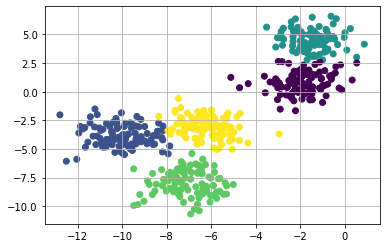

In [46]:
# visualize clusters
plt.scatter(*zip(*X), c=preds, cmap='viridis')
plt.grid()

A Gaussian mixture model is a generative model, meaning you can sample new instances from it (note that they are ordered by cluster index):

In [47]:
X_new, y_new = gm.sample(6)
print(f"X_new - \n{X_new}")
print(f"y_new - \n{y_new}")

X_new - 
[[-2.27569201  0.04051546]
 [-2.21384576  0.6914564 ]
 [-9.61812985 -3.59510992]
 [-0.81691926  5.24775271]
 [-2.63012961  5.97107441]
 [-6.0844744  -2.28923859]]
y_new - 
[0 0 1 2 2 4]


It is also possible to estimate the density of the model at any given location. This is achieved using the score_samples() method: for each instance it is given, this method estimates the log of the probability density function (PDF) at that location. The greater the score, the higher the density.

In [48]:
gm.score_samples(X[:10])

array([-3.72205106, -4.03450985, -4.36999626, -3.75015652, -4.76486667,
       -3.83624118, -4.1844028 , -3.51887743, -3.48890944, -3.67276462])

### Anomaly Detection Using Gaussian Mixtures

Using a Gaussian mixture model for anomaly detection is quite simple: any instance located in a low-density region can be considered an anomaly. You must define what density threshold you want to use. Here is how you would identify the outliers using the fourth percentile lowest density as the threshold (i.e., approximately 4% of the instances will be flagged as anomalies):

In [49]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

In [50]:
anomalies

array([[ -2.90463943,  -1.5218712 ],
       [ -5.1184149 ,   1.25618705],
       [  0.5260155 ,   3.00999353],
       [  0.8687658 ,   4.15785509],
       [ -9.29199482,  -9.85256171],
       [ -4.72877645,   0.34990606],
       [ -3.51754177,   5.6426539 ],
       [-12.7907975 ,  -2.01581973],
       [ -6.92324165, -10.66953197],
       [-12.03491373,  -5.89593773],
       [-12.50415316,  -6.06751247],
       [ -4.34194851,   0.70671014],
       [  0.53113982,   2.51012895],
       [ -9.47838518,  -9.93079448],
       [ -0.6207353 ,   6.59346952],
       [ -7.47065728,  -0.58280517],
       [ -2.95371702,  -3.68901079],
       [ -2.21788668,  -1.65617383],
       [ -9.48263889,  -6.73588302],
       [-11.2174569 ,  -1.5039799 ]])

A closely related task is novelty detection: it differs from anomaly detection in that the algorithm is assumed to be trained on a “clean” dataset, uncontaminated by outliers, whereas anomaly detection does not make this assumption. Indeed, outlier detection is often used to clean up a dataset.

### Selecting the Number of Clusters

With K-Means, you could use the inertia or the silhouette score to select the appropriate number of clusters. But with Gaussian mixtures, it is not possible to use these metrics because they are not reliable when the clusters are not spherical or have different sizes. Instead, you can try to find the model that minimizes a theoretical information criterion, such as the ***Bayesian information criterion (BIC)*** or the ***Akaike information criterion (AIC)***:

$
BIC = log(m) p - 2 log(\hat{L}) \\
AIC = 2p -  2 log(\hat{L})
$

In these equations:
* m is the number of instances, as always.
* p is the number of parameters learned by the model.
* $\hat{L}$ is the maximized value of the likelihood function of the model.

Both the BIC and the AIC penalize models that have more parameters to learn (e.g., more clusters) and reward models that fit the data well. They often end up selecting the same model. When they differ, the model selected by the BIC tends to be simpler (fewer parameters) than the one selected by the AIC, but tends to not fit the data quite as well (this is especially true for larger datasets).

In [51]:
# computing AIC and BIC
aic = gm.aic(X)
print(f"AIC - {aic}")

bic = gm.bic(X)
print(f"BIC - {bic}")

AIC - 4345.768944105599
BIC - 4467.992578959843


In [52]:
# lets try out aic and bic for different values of clusters
aics = []
bics = []

for i in range(1, 10):
    gm = GaussianMixture(n_components=i, n_init=10)
    gm.fit(X)
    aics.append(gm.aic(X))
    bics.append(gm.bic(X))

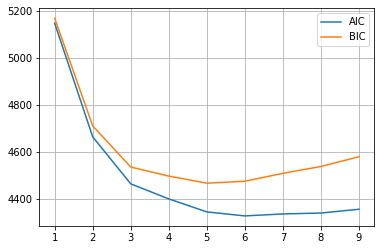

In [53]:
# plot AIC and BIC
plt.plot(range(1, 10), aics, label='AIC')
plt.plot(range(1, 10), bics, label='BIC')
plt.legend()
plt.grid()
plt.show()

As we can see that AIC and BIC are minimum at n=5, therefore it could be a good choice.

### Bayesian Gaussian Mixture Models

Rather than manually searching for the optimal number of clusters, you can use the BayesianGaussianMixture class, which is capable of giving weights equal (or close) to zero to unnecessary clusters. Set the number of clusters n_components to a value that you have good reason to believe is greater than the optimal number of clusters (this assumes some minimal knowledge about the problem at hand), and the algorithm will eliminate the unnecessary clusters automatically. For example, let’s set the number of clusters to 10 and see what happens:

In [54]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
print(np.round(bgm.weights_, 2))

[0.22 0.   0.21 0.17 0.21 0.19 0.   0.   0.   0.  ]


Perfect: the algorithm automatically detected that only five clusters are needed. 

Gaussian mixture models work great on clusters with ellipsoidal shapes, but if you try to fit a dataset with different shapes, you may have bad surprises.

### Other Algorithms for Anomaly and Novelty Detection

* ***PCA with inverse transform*** - If you compare the reconstruction error of a normal instance with the reconstruction error of an anomaly, the latter will usually be much larger. This is a simple and often quite efficient anomaly detection approach.
* ***Fast-MCD (minimum covariance determinant)*** - Implemented by the EllipticEnvelope class, this algorithm is useful for outlier detection, in particular to clean up a dataset. It assumes that the normal instances (inliers) are generated from a single Gaussian distribution (not a mixture). It also assumes that the dataset is contaminated with outliers that were not generated from this Gaussian distribution. When the algorithm estimates the parameters of the Gaussian distribution (i.e., the shape of the elliptic envelope around the inliers), it is careful to ignore the instances that are most likely outliers. This technique gives a better estimation of the elliptic envelope and thus makes the algorithm better at identifying the outliers.
* ***Isolation Forest*** - This is an efficient algorithm for outlier detection, especially in high-dimensional datasets. The algorithm builds a Random Forest in which each Decision Tree is grown randomly: at each node, it picks a feature randomly, then it picks a random threshold value (between the min and max values) to split the dataset in two. The dataset gradually gets chopped into pieces this way, until all instances end up isolated from the other instances. Anomalies are usually far from other instances, so on average (across all the Decision Trees) they tend to get isolated in fewer steps than normal instances.
* Local Outlier Factor (LOF) - It compares the density of instances around a given instance to the density around its neighbors. An anomaly is often more isolated than its k nearest neighbors.
* One-class SVM - This algorithm is better suited for novelty detection. Recall that a kernelized SVM classifier separates two classes by first (implicitly) mapping all the instances to a high-dimensional space, then separating the two classes using a linear SVM classifier within this high-dimensional space. Since we just have one class of instances, the one-class SVM algorithm instead tries to separate the instances in high-dimensional space from the origin. In the original space, this will correspond to finding a small region that encompasses all the instances. If a new instance does not fall within this region, it is an anomaly. 